In [25]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import numpy as np

rallyname = 'Acropolis'
raceDate = '05-08/09/2024'
surface = 'Gravel'
competition = 'WRC'

link = 'https://www.ewrc-results.com/results/85535-eko-acropolis-rally-2024/?s='
startat, no_ss=460165, int(15)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []
overall_23 = []

In [26]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [31]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data1 = pd.read_html(page_html11)[1]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data1.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','total_time', 'Diff', 'Speed']
    data['ss']=ss+1
    data1['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    equal = '=' in data1['Pos.'].unique()
    if equal:
        data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
        data1['Pos.'] = data1['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data1)
    rally_23.append(data) 
    overall_23.append(data1)

C:\Users\ilias\AppData\Local\Temp\ipykernel_32760\3615709284.py:19: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_32760\3615709284.py:23: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data1['Pos.'] = data1['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_32760\3615709284.py:19: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_32760\3615709284.py:19: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
C:\Users\ilias\AppData\Local\Temp\ipykernel_32760\3615

In [32]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally_overall = pd.concat(overall_23, axis=0)
rally_overall.tail(50)

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss
2,3. +1,#8,Tänak Ott - Järveoja Martin Hyundai i20 N Rall...,RC1 M,3:41:01.5,+2:57.3 +1:10.5,82.9 0.58,15
3,4. +1,#20,Pajari Sami - Mälkönen Enni Toyota GR Yaris Ra...,RC2,3:45:05.3,+7:01.1 +4:03.8,81.4 1.38,15
4,= +1,#28,Virves Robert - Lesk Aleks Škoda Fabia RS Rally2,RC2,3:45:05.3,+7:01.1 +0.0,81.4 1.38,15
5,6. +1,#21,Rossel Yohan - Barral Florian Citroën C3 Rally2,RC2,3:45:36.1,+7:31.9 +30.8,81.2 1.48,15
6,7. +1,#29,Kajetanowicz K. - Szczepaniak M. Škoda Fabia R...,RC2,3:47:58.2 0:10,+9:54.0 +2:22.1,80.4 1.95,15
7,8. +1,#30,Zaldivar F. - Der Ohannesian M. Škoda Fabia RS...,RC2,3:49:32.1,+11:27.9 +1:33.9,79.8 2.25,15
8,9. +2,#26,McErlean Josh - Fulton James Škoda Fabia RS Ra...,RC2,3:50:31.4,+12:27.2 +59.3,79.5 2.45,15
9,10. +2,#32,Daprà Roberto - Guglielmetti Luca Škoda Fabia ...,RC2,3:51:49.1,+13:44.9 +1:17.7,79.0 2.70,15
10,11. +2,#24,Solans Jan - Sanjuan Rodrigo Toyota GR Yaris R...,RC2,3:57:26.9 1:40,+19:22.7 +5:37.8,77.7 3.81,15
11,12. +2,#40,Panagiotis Roustemis - Bakloris C. Škoda Fabia...,RC2,3:58:28.2,+20:24.0 +1:01.3,76.8 4.01,15


In [33]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally_overall['Pos.'] = rally_overall['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[:3]
rally_overall['Race'] = rallyname
rally_overall['date'] = raceDate
rally_overall['surface'] = surface
rally_overall['competition'] = competition
rally_overall['Crew'] = rally_overall['Crew'].str[:14]
rally_overall['Gr/Cl'] = rally_overall['Gr/Cl'].str[:3]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally_overall['cPos']= rally_overall.groupby(['Race', 'ss']).cumcount()+1
rally_overall[['Stages_time', 'Penalty']] = rally_overall['total_time'].str.split(' ', expand=True)
rally_overall['Penalty'] = rally_overall['Penalty'].astype(str).replace(to_replace='None', value=0)
'''
rally_overall['Stages_t_s'], rally_overall['Stages_t_m'], rally_overall['Stages_t_h']= rally_overall['Stages_time'].str[-5:], rally_overall['Stages_time'].str[-8:-6].astype(int), rally_overall['Stages_time'].str[:-9]
rally_overall['Penalty_m'], rally_overall['Penalty_s'] = rally_overall['Penalty'].str[:-3], rally_overall['Penalty'].str[-2:]
rally_overall[['Diff_1st', 'Diff_Pre']] = rally_overall['Diff'].str.split(' +', expand=True)
rally_overall['Diff_1st'] = rally_overall['Diff_1st'].str.replace('+', '')
rally_overall = rally_overall.replace('',0)
rally_overall.fillna(0, inplace=True)
cols = ['Stages_t_h', 'Stages_t_m', 'Stages_t_s', 'Penalty_m', 'Penalty_s']
rally_overall[cols] = rally_overall[cols].apply(pd.to_numeric, errors='coerce', axis=1)
rally_overall['time'] = rally_overall['Stages_t_s'] +  rally_overall['Stages_t_m'] *60 + rally_overall['Stages_t_h'] *3600
#rally_overall.to_csv('trialData.csv', index=False)
'''
rally_overall

,Pos.,No,Crew,Gr/Cl,total_time,Diff,Speed,ss,Race,date,surface,competition,cPos,Stages_time,Penalty
0,1.0,#17,Ogier Sébastie,RC1,16:33.2,NaN,81.4,1,Acropolis,05-08/09/2024,Gravel,WRC,1,16:33.2,0
1,2.0,#8,Tänak Ott - Jä,RC1,16:33.8,+0.6 +0.6,81.4 0.03,1,Acropolis,05-08/09/2024,Gravel,WRC,2,16:33.8,0
2,3.0,#16,Fourmaux Adrie,RC1,16:34.0,+0.8 +0.2,81.4 0.04,1,Acropolis,05-08/09/2024,Gravel,WRC,3,16:34.0,0
3,4.0,#18,Katsuta Takamo,RC1,16:35.9,+2.7 +1.9,81.2 0.12,1,Acropolis,05-08/09/2024,Gravel,WRC,4,16:35.9,0
4,5.0,#6,Sordo Dani - C,RC1,16:42.5,+9.3 +6.6,80.7 0.41,1,Acropolis,05-08/09/2024,Gravel,WRC,5,16:42.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,48. +3,#23,Gryazin Nikola,RC2,5:09:21.9 3:50,+1:31:17.7 +1:05.9,60.0 17.9,15,Acropolis,05-08/09/2024,Gravel,WRC,100,5:09:21.9,3:50
48,49. −1,#85,Parellis Dimit,RC5,5:10:27.5,+1:32:23.3 +1:05.6,59.0 18.2,15,Acropolis,05-08/09/2024,Gravel,WRC,101,5:10:27.5,0
49,50. +2,#77,Cărăgui Eugen,RC2,5:11:58.8 0:10,+1:33:54.6 +1:31.3,58.7 18.5,15,Acropolis,05-08/09/2024,Gravel,WRC,102,5:11:58.8,0:10
50,51. +2,#82,Plagos Ioannis,RC4,5:33:25.7,+1:55:21.5 +21:26.9,54.9 22.7,15,Acropolis,05-08/09/2024,Gravel,WRC,103,5:33:25.7,0


In [34]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
rally2023_stages['ss_time'] =  rally2023_stages['ss_time'].str.replace('[N]', '')
rally2023_stages['qq'] = rally2023_stages['ss_time'].str.count(':') 
rally2023_stages = rally2023_stages.drop(rally2023_stages[rally2023_stages.qq > 1], axis=1)
rally2023_stages.to_csv('ssss.csv', index=False)
rally2023_stages.to_csv('sssa.csv')
rally2023_stages

ValueError: Index contains duplicate entries, cannot reshape

In [6]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':')
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv( str(rallyname) + '_Stages_Times_Sec.csv',index=False)

rally2023_stages

ValueError: Columns must be same length as key

In [10]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

KeyError: 'Column not found: time_SS_sec'

In [15]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

KeyError: 'time_SS_sec'

In [16]:
Group = 'C'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2', 'RC3', 'RC4', 'RC5']))]
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
#ss_times_WRC.to_csv(str(rallyname) + str(Group) + '.csv')
ss_times_WRC.to_csv('test2a.csv')

In [17]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

KeyError: "['time_SS_sec', 'cou'] not found in axis"

NameError: name 'ss_times_F4' is not defined

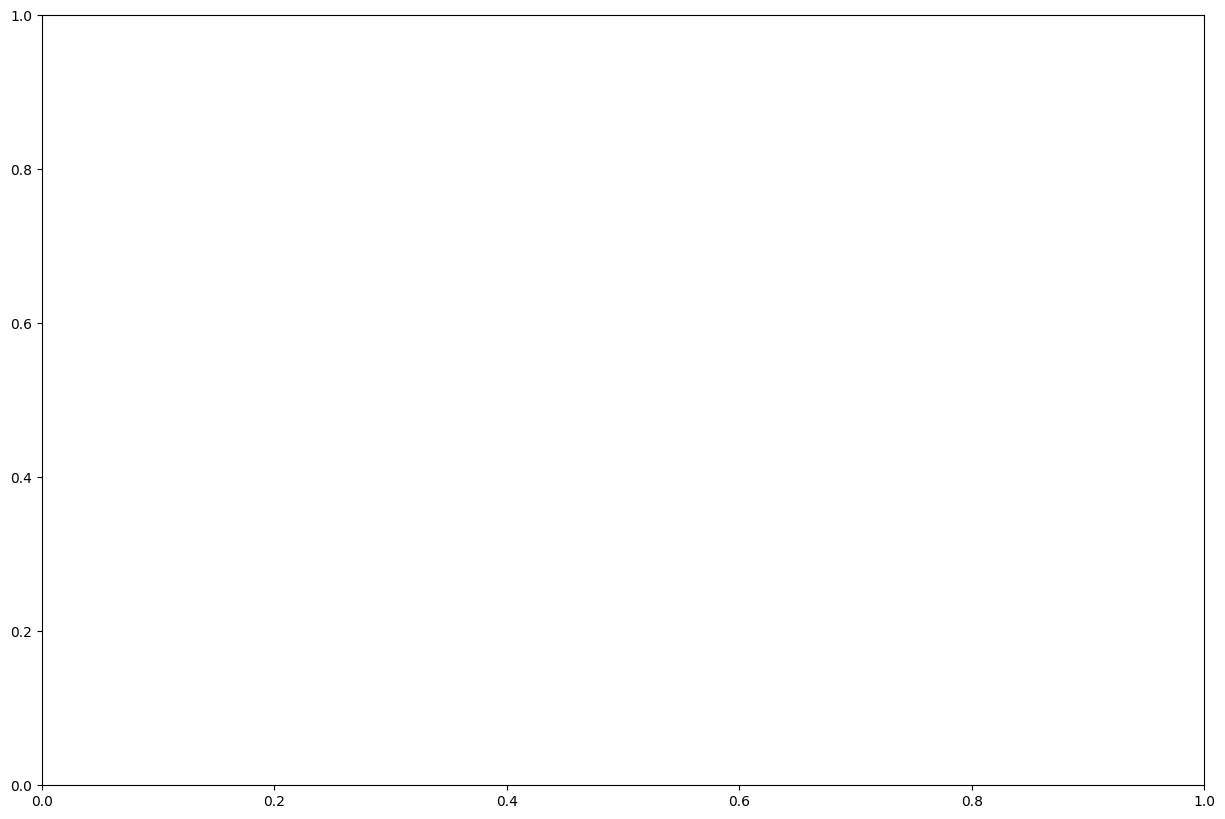

In [18]:
fig,ax = plt.subplots()
#fig.set_size_inches(30,30)
fig.set_size_inches(15,10)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
#plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
#plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.title(rallyname+'\nΔιαφορές ανάμεσα στο '+ Group + ' από τον νικητή της Ε.Δ. (sec)')
plt.savefig("Heatmap_" + Group + rallyname + ".png")
plt.show()

In [19]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig("Boxplot_" + rallyname + Group + ".png")

KeyError: 'time_SS_sec'

NameError: name 'ss_times_F3' is not defined

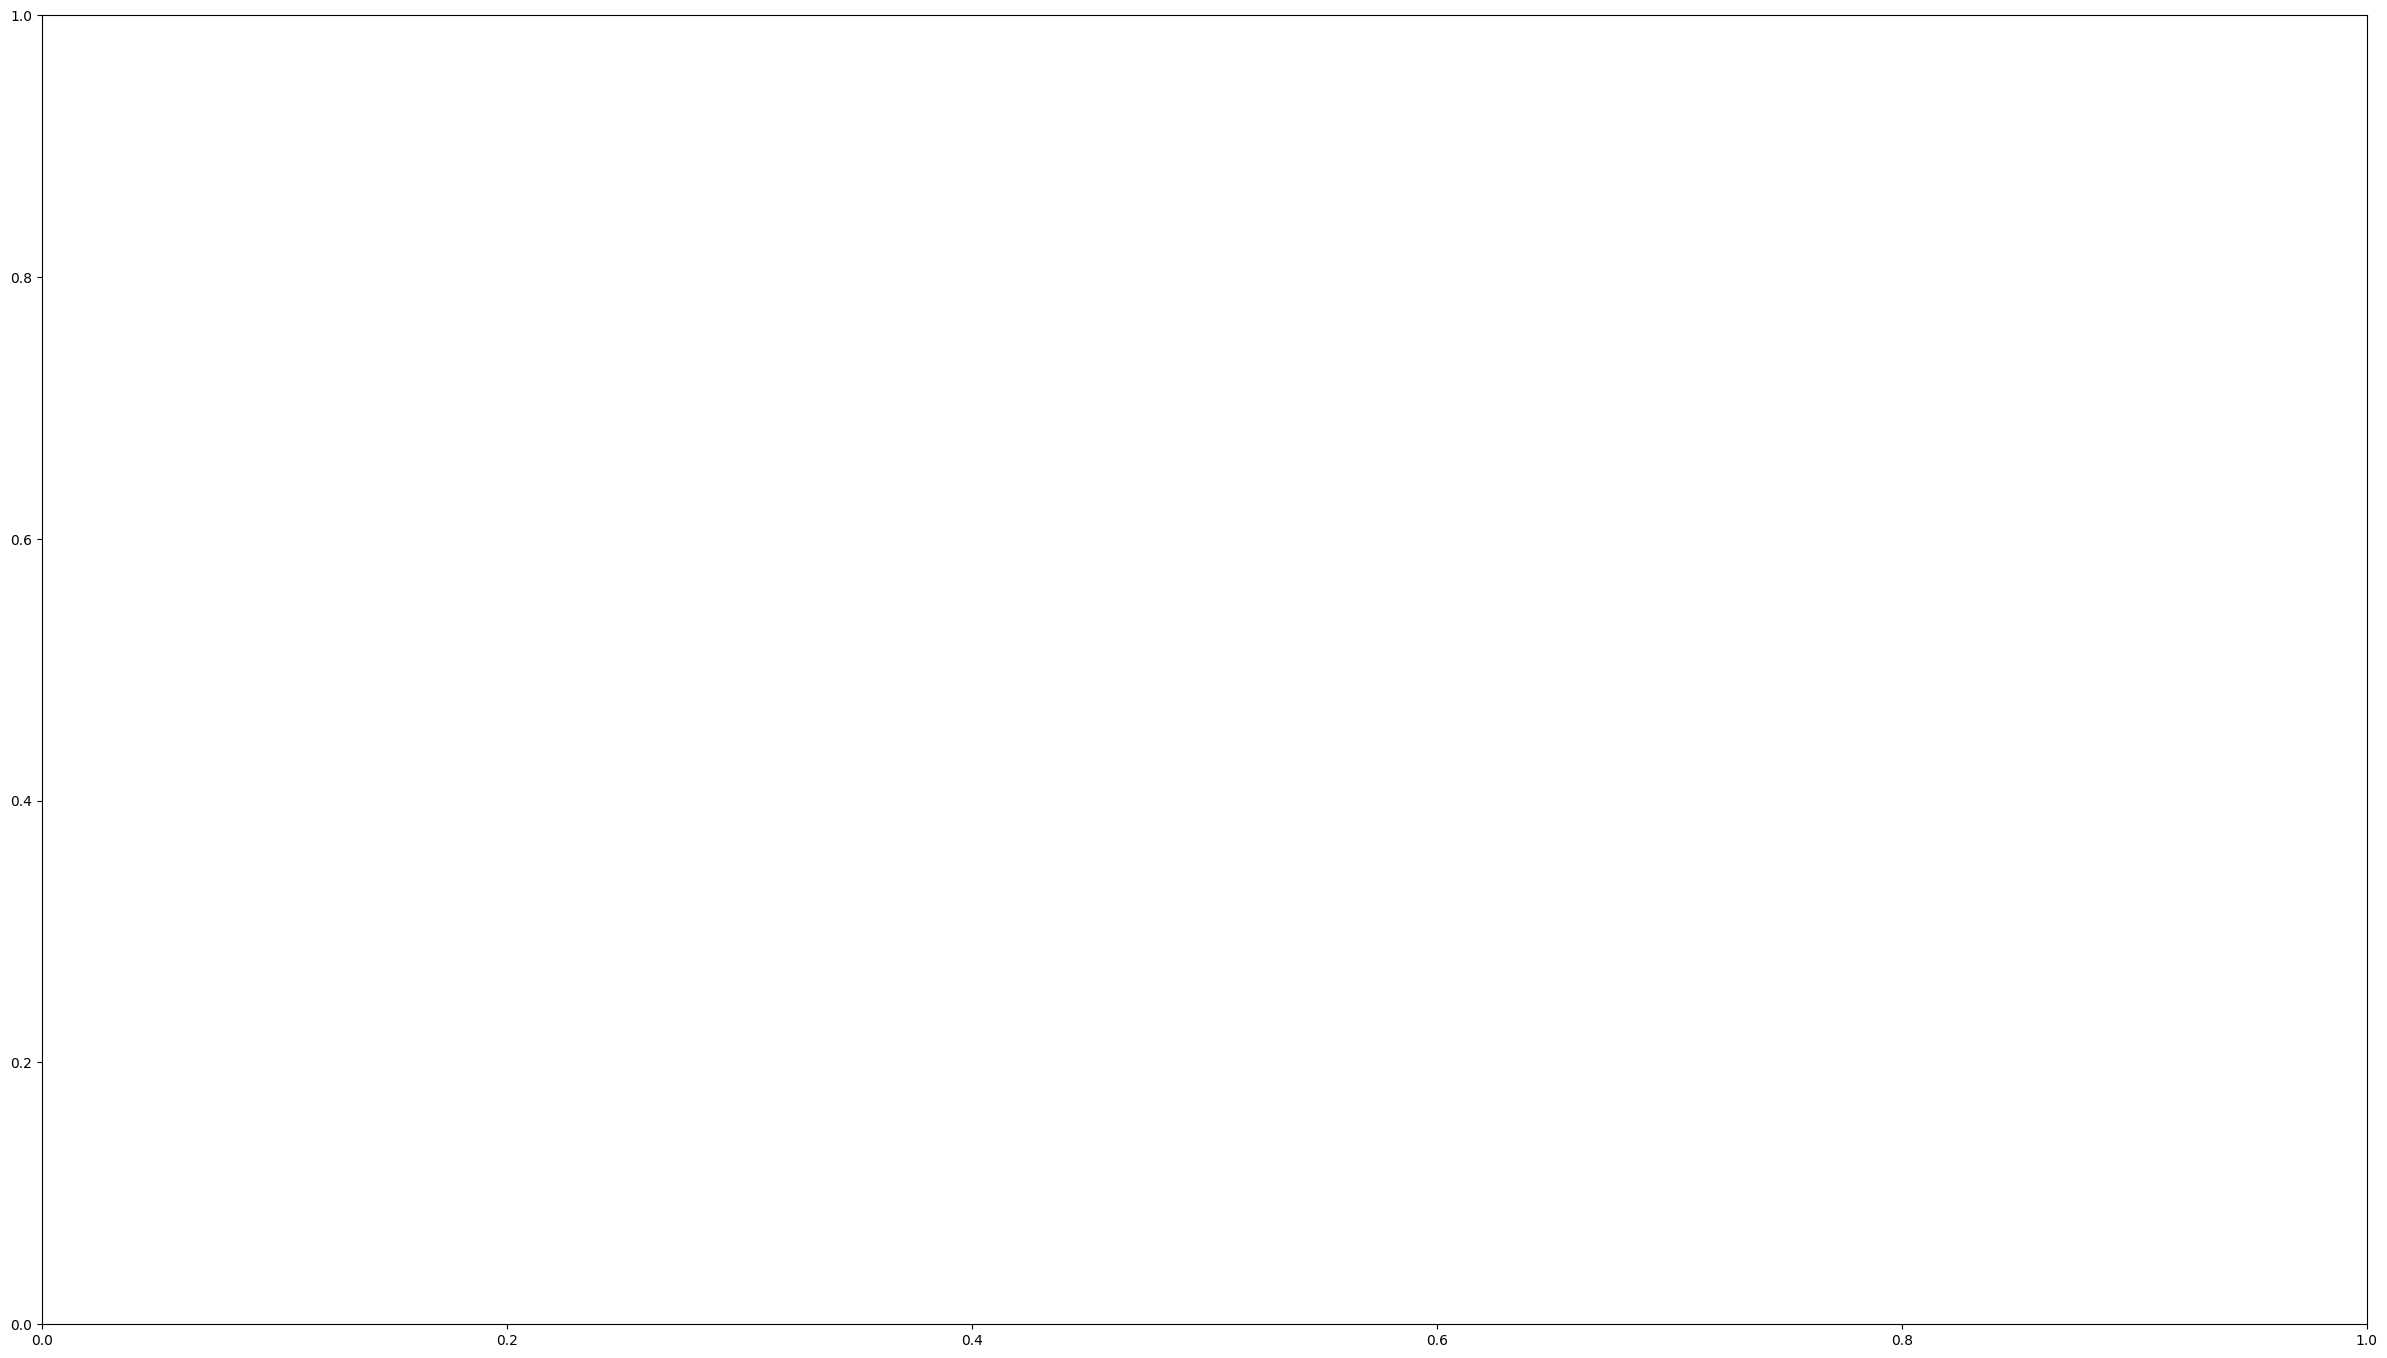

In [20]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(30,17)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between ' + Group + ' Participants and Group Stage winer (%)')
plt.savefig(rallyname + Group + ".png")
plt.show()

In [21]:
ss_times_FIXED = ss_times_WRC.drop(ss_times_WRC[ss_times_WRC['time_SS_sec']>=1.2*ss_times_WRC['min_time_Gr']].index)
ss_times_FIXED
#ss_times_WRC

KeyError: 'time_SS_sec'

In [22]:
sns.violinplot(y=ss_times_FIXED['time_SS_sec'], x=ss_times_FIXED['ss'],hue=ss_times_FIXED['Gr/Cl'])
plt.savefig(rallyname + '_violinplot.png')

NameError: name 'ss_times_FIXED' is not defined

In [23]:
#sns.boxplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
sns.violinplot( y=ss_times_FIXED["time_SS_sec"], x=ss_times_FIXED["ss"])
plt.savefig(rallyname + '_violinplot_FIXED.png')

NameError: name 'ss_times_FIXED' is not defined

In [24]:
Agioi = ss_times_FIXED[(ss_times_FIXED["ss"] % 2 ==1)] #& (ss_times_FIXED["ss"] < 5)]
Pisia = ss_times_FIXED[ss_times_FIXED["ss"] % 2 == 0]
#Moschopodi = ss_times_FIXED[ss_times_FIXED["ss"] == 5]

NameError: name 'ss_times_FIXED' is not defined

In [25]:
fig.set_size_inches(20,15)
sns.violinplot( y=Agioi["time_SS_sec"], x=Agioi["ss"], hue = Agioi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Thiva_violinplot.png')
plt.show()
fig.set_size_inches(30,20)
sns.violinplot( y=Pisia["time_SS_sec"], x=Pisia["ss"], hue = Pisia["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Elikonas_violinnplot.png')
plt.show()
'''fig.set_size_inches(30,25)
sns.violinplot( y=Moschopodi["time_SS_sec"], x=Moschopodi["ss"], hue = Moschopodi["Gr/Cl"])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig(rallyname + '_Moschopodi_violinnplot.png')
'''

NameError: name 'Agioi' is not defined

In [26]:
Group = 'RC1 - RC2'
#ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['RC1', 'RC2']))]
ss_times_C6.to_csv(str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv('test2a.csv')

In [27]:
ss_times_C6_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_C6_F4 = pd.pivot_table(ss_times_C6_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_C6_F4

KeyError: "['time_SS_sec', 'cou'] not found in axis"

NameError: name 'ss_times_C6_F4' is not defined

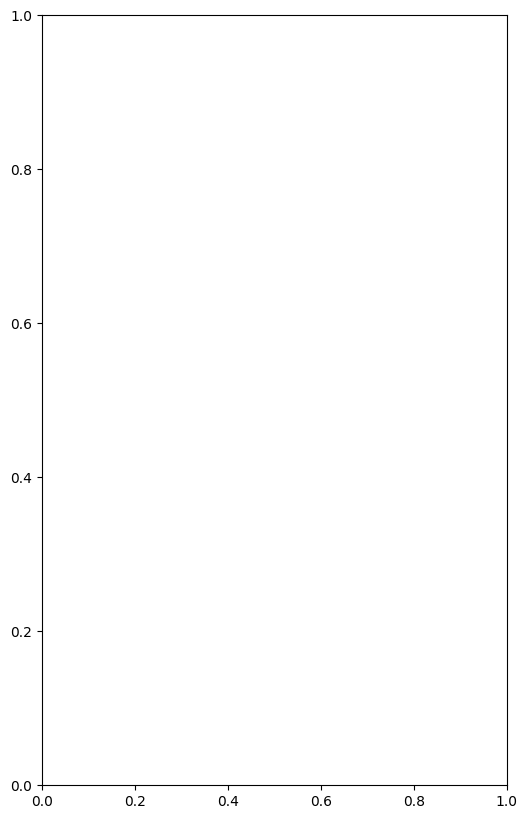

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(6,10)
Heatmap_ALL = sns.heatmap(ss_times_C6_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants and Stage winer (sec)')
plt.savefig("Heatmap_" + Group + ".png")
plt.show()

In [29]:
min_value_overall = rally_overall.groupby(['Race', 'ss'])['time'].min()
min_value_overall_G = rally_overall.groupby(['Race', 'ss', 'Gr/Cl'])['time'].min()
#min_value = pd.DataFrame(min_value)

min_value_overall_2 =  pd.DataFrame(min_value_overall)
min_value_overall_2_G =  pd.DataFrame(min_value_overall_G)

min_value_overall_2_G = min_value_overall_2_G.rename(columns={'time' : 'min_time_Gr'})
min_value_overall_2 = min_value_overall_2.rename(columns={'time' : 'min_time'})
min_value_overall_2_G

KeyError: 'Column not found: time'

In [30]:
ss_times_F_G_overall = rally_overall.merge(min_value_overall_2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F_overall = ss_times_F_G_overall.merge(min_value2, on=['Race', 'ss'])
ss_times_F_overall['diff']=ss_times_F_overall['time'] - ss_times_F_overall['min_time']
ss_times_F_overall['diff_G']=ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr']
ss_times_F_overall['diff_G%']=(ss_times_F_overall['time'] - ss_times_F_overall['min_time_Gr'])/ss_times_F_overall['min_time_Gr']*100
ss_times_F_overall['SS.']=ss_times_F_overall['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F_overall

NameError: name 'min_value_overall_2_G' is not defined

In [31]:
Group = 'RC1'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_combine = ss_times_F_overall[ss_times_F_overall['Gr/Cl'].str.contains('|'.join(['C1', 'C2', 'C3', 'C4', 'C5', 'C6']))]
ss_times_combine.to_csv(str(rallyname) + str(Group) + '_classification.csv')
ss_times_combine.columns

NameError: name 'ss_times_F_overall' is not defined

In [32]:
ss_times_F3_overall =ss_times_combine.drop(['Gr/Cl','time','cPos', 'ss'], axis=1)
ss_times_F4_group = pd.pivot_table(ss_times_F3_overall, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4_overall = pd.pivot_table(ss_times_F3_overall, values='diff', index='Crew', columns=['SS.'])
ss_times_F4_overall

NameError: name 'ss_times_combine' is not defined

NameError: name 'ss_times_F4_overall' is not defined

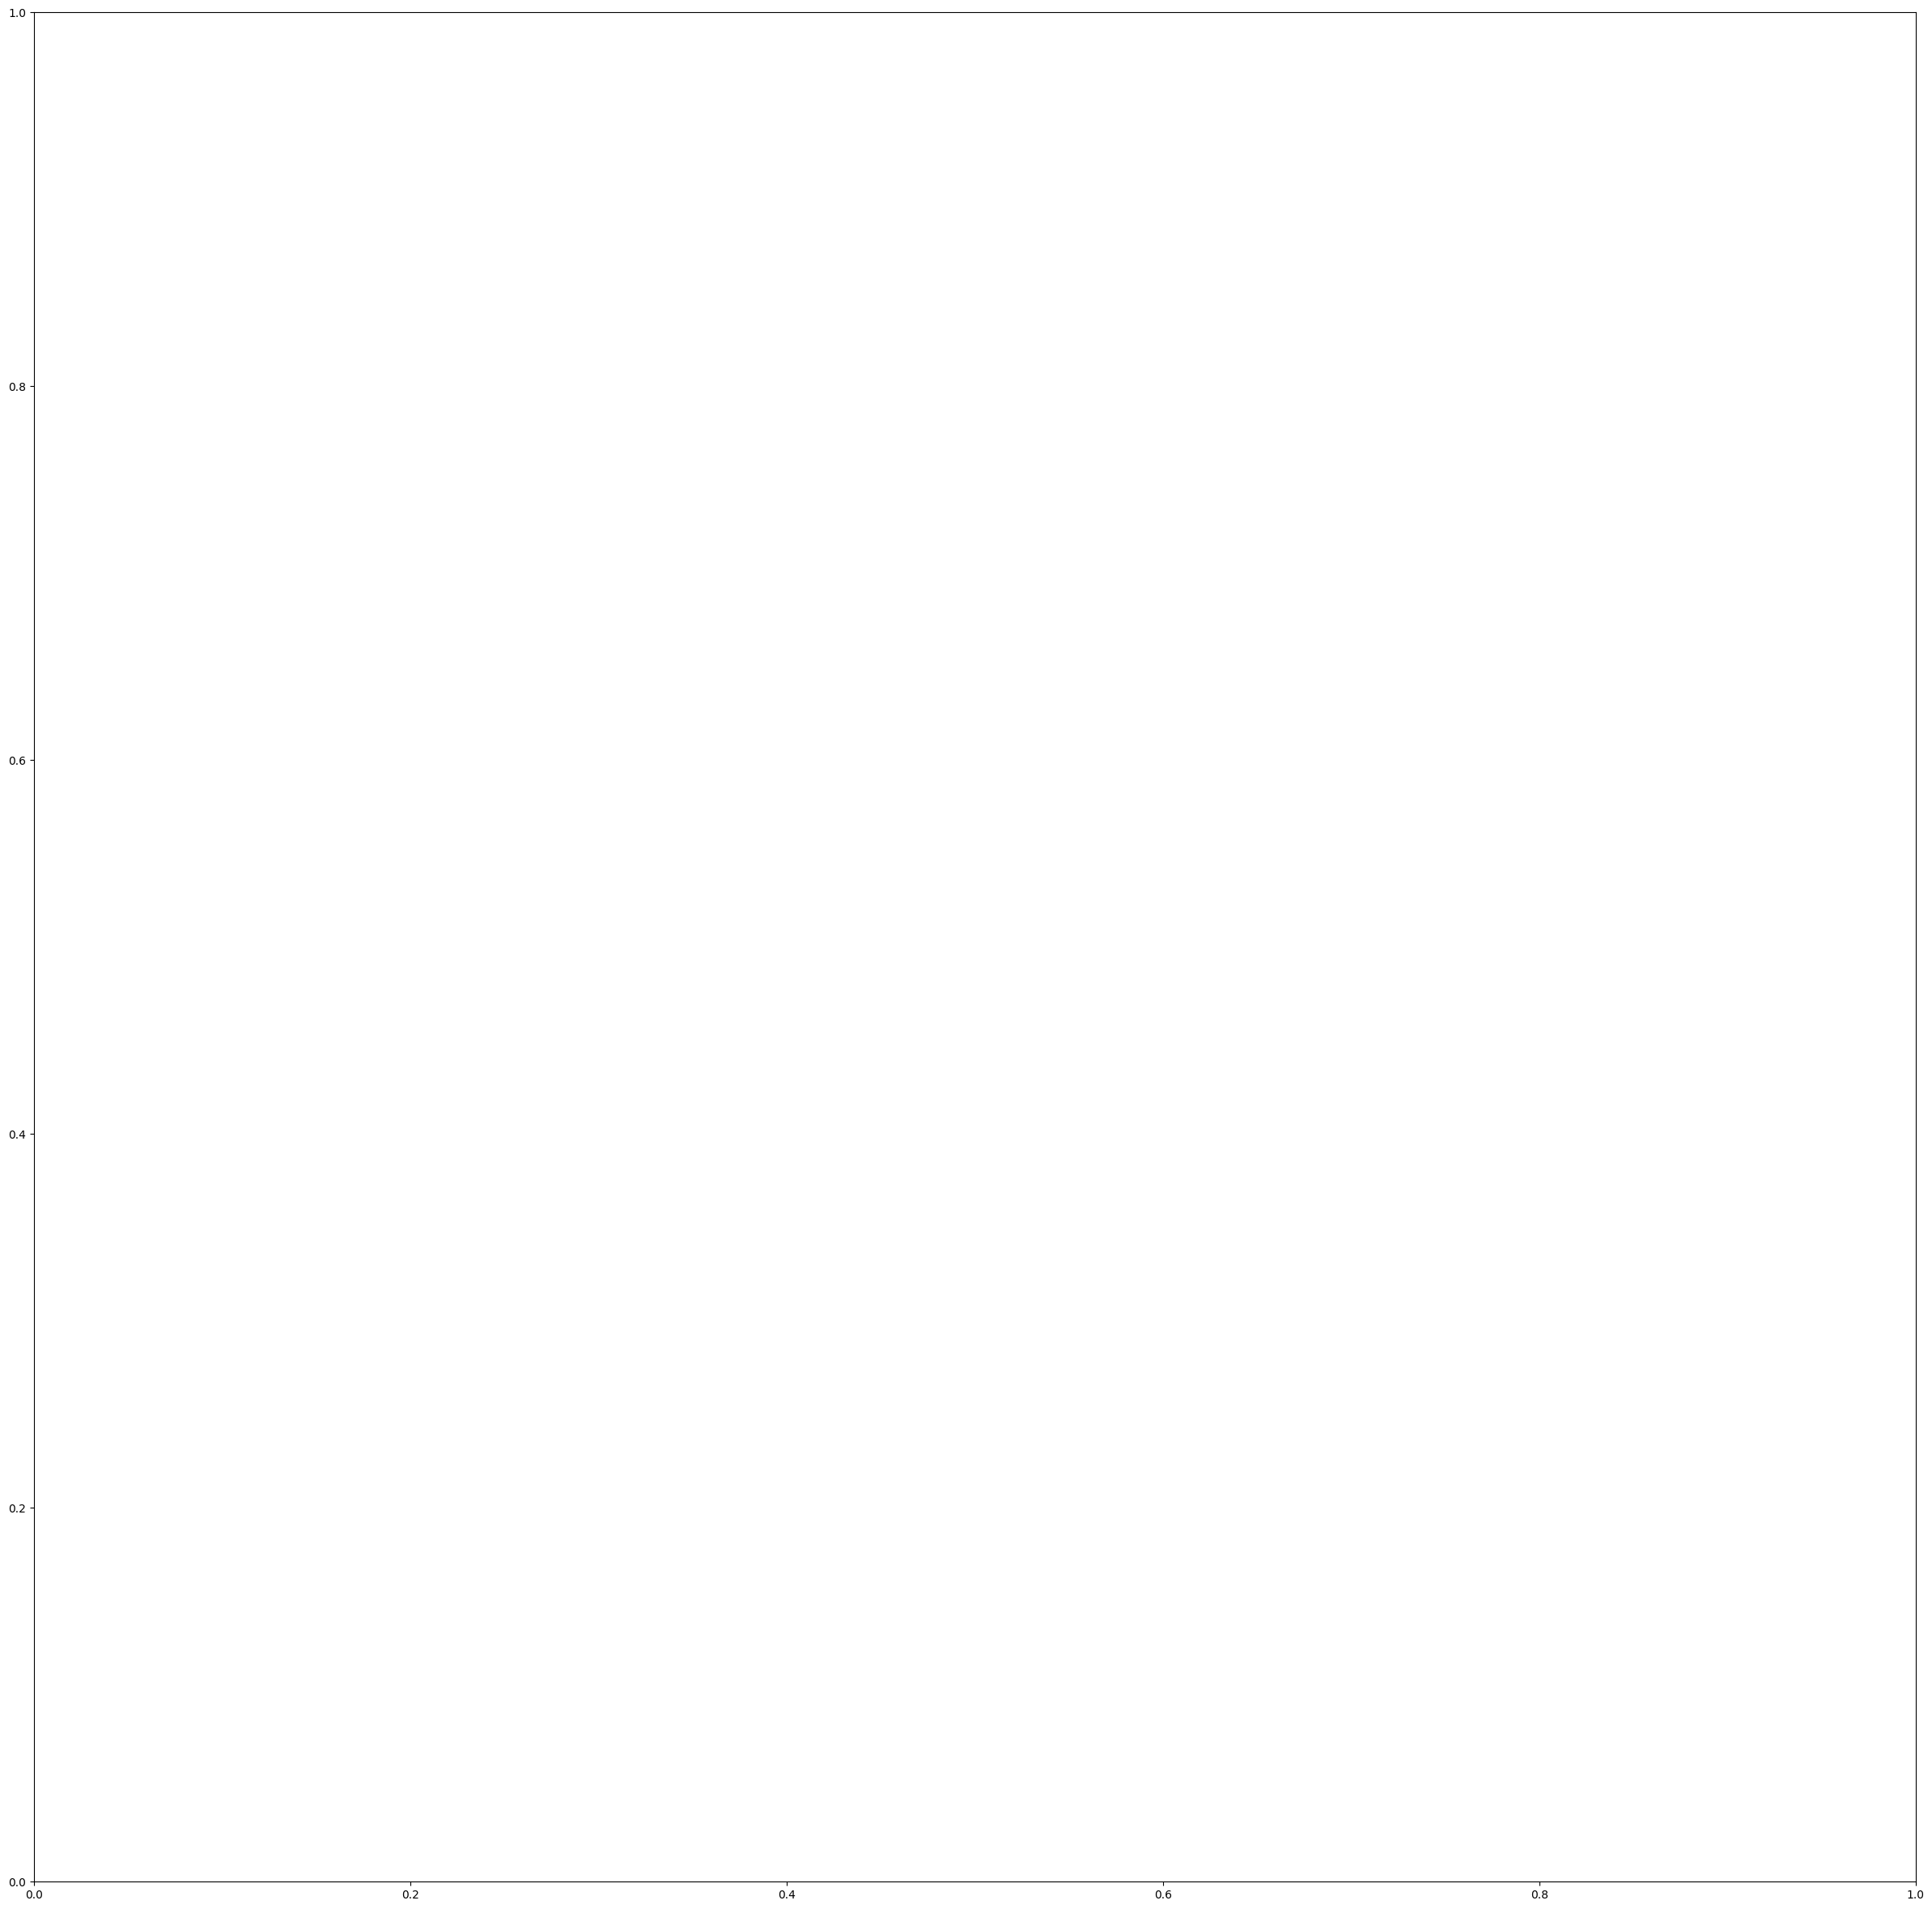

In [27]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_overall, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_" + Group + rallyname + ".png")
plt.show()

NameError: name 'ss_times_F4_group' is not defined

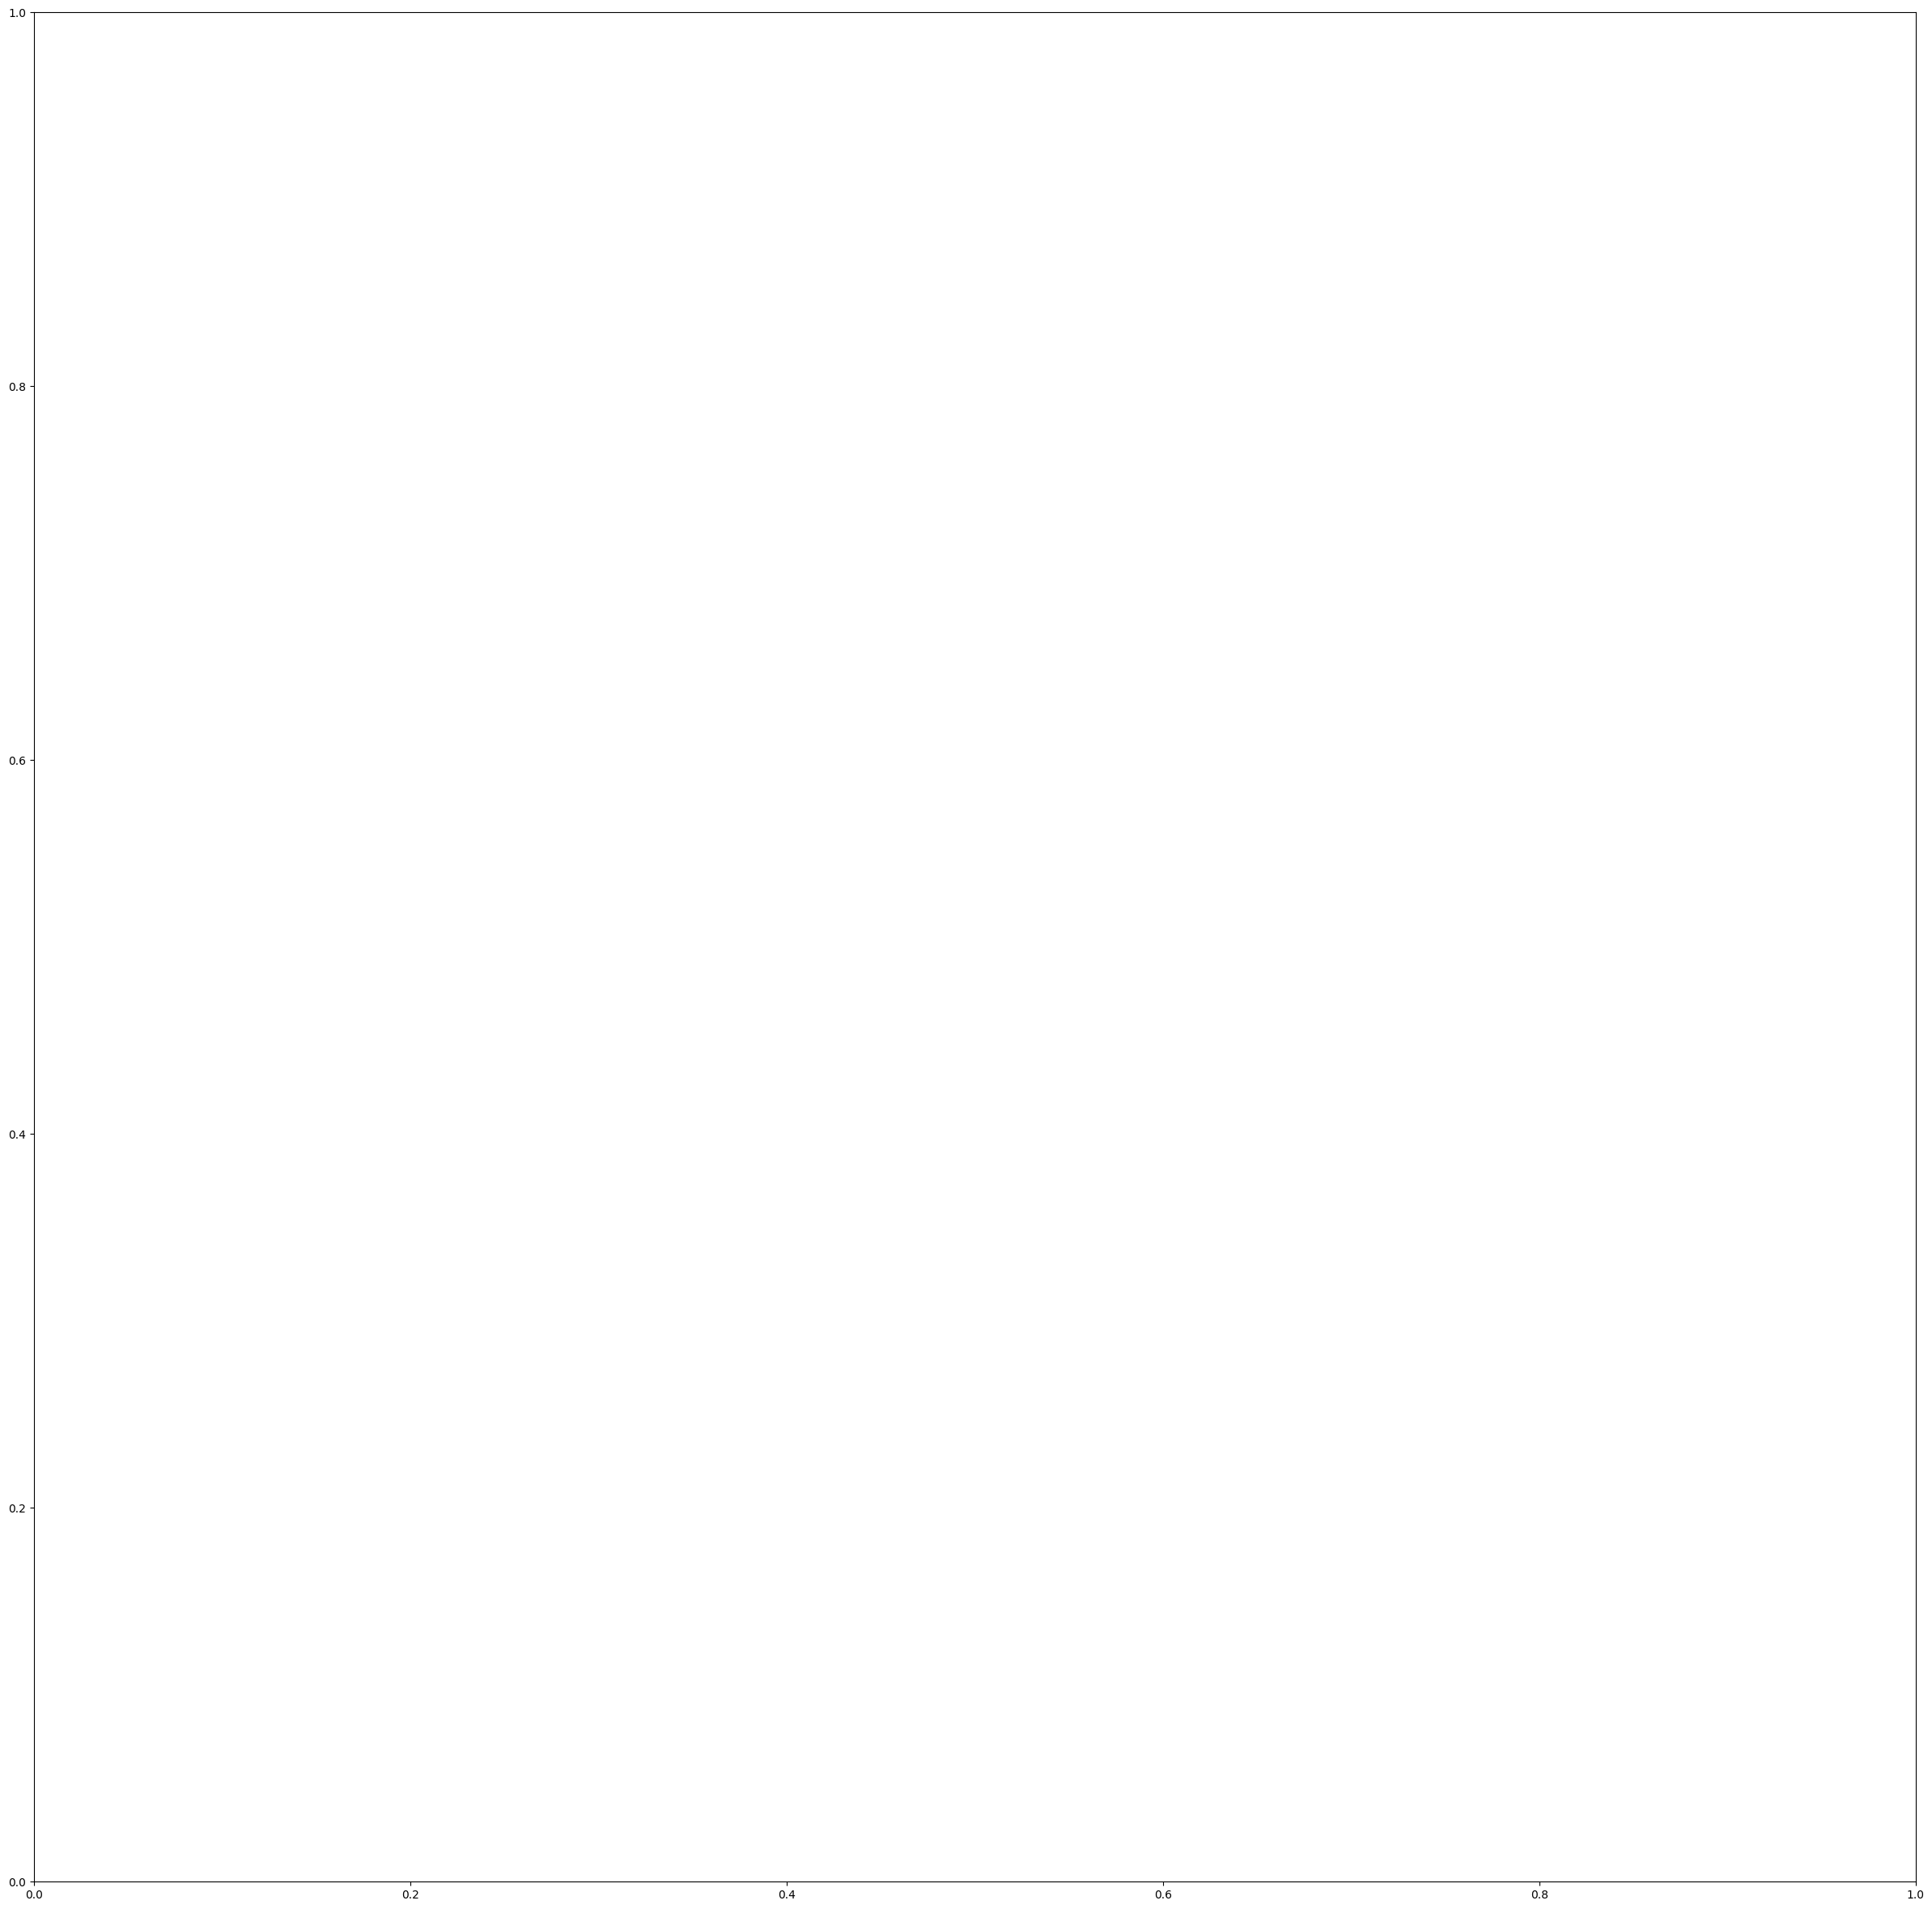

In [28]:
fig,ax = plt.subplots()
fig.set_size_inches(30,30)
Heatmap_ALL = sns.heatmap(ss_times_F4_group, cmap='coolwarm')
plt.title(rallyname+'\nDiference between '+ Group + ' Participants in Classification (sec)')
plt.savefig("Classification_Heatmap_Group" + Group + rallyname + ".png")
plt.show()